In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [12]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [13]:
# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [15]:
# Define the autoencoder model
input_size = 784  # 28x28 flattened image
encoding_dim = 32  # Size of the encoded representation

In [16]:
# Encoder
input_img = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [17]:
# Decoder
decoded = Dense(input_size, activation='sigmoid')(encoded)

In [18]:
# Autoencoder model
autoencoder = Model(input_img, decoded)

In [19]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [20]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2795 - val_loss: 0.1926
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1695 - val_loss: 0.1522
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1433 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1281 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1183 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1114 - val_loss: 0.1073
Epoch 7/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1061 - val_loss: 0.1028
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1022 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0995 - val_loss: 0.0972
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0976 - val_lo

In [26]:
# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


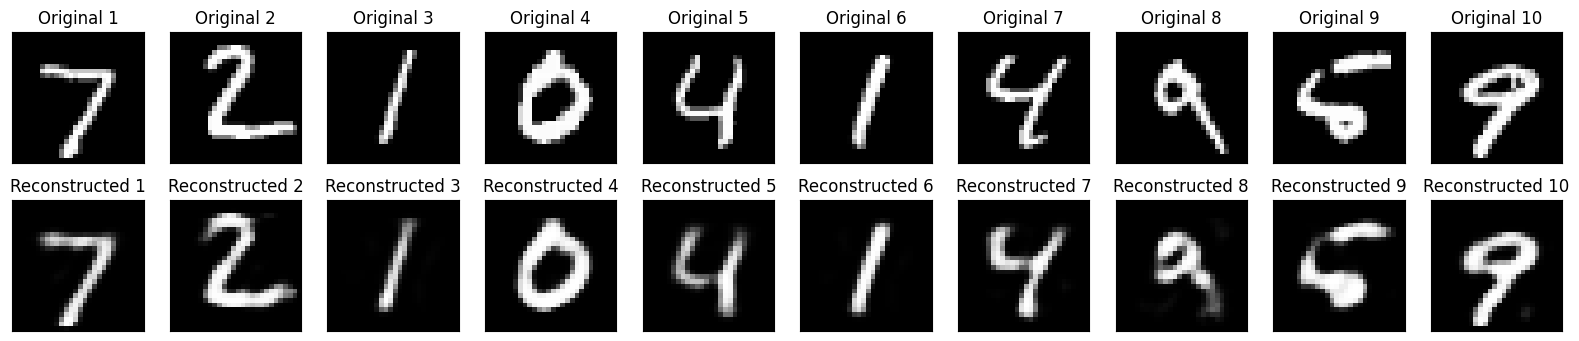

In [29]:
# Visualize 10 original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f'Original {i+1}')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f'Reconstructed {i+1}')

plt.show()

''

''